# KNN classifier

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src.knn import knn
from src.utils import *
import pickle
sns.set()

plt.rc('legend',fontsize=13)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Creditcard dataset

In [2]:
data_set_name = "creditcard"
#df, dd, ddi = knn("creditcard",
#                  n_neighbors_values=range(1,15,1),
#                  p_values=range(1,6),
#                  training_sizes=range(10000, 210001, 25000))
with open("stats/knn_" + data_set_name + "_dict.pikle", 'rb') as handle:
    dd = pickle.load(handle)
with open("stats/knn_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
    ddi = pickle.load(handle)

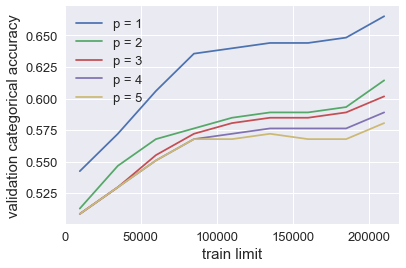

In [4]:
cd = consolidate_dict_data(dd, consolidate_argx=ddi['train_limit'], argx_name='train_limit',
                           consolidate_argy=ddi['score_type'], argy_name='score',
                           consolidate_argz=ddi['p'],
                           filters=[(ddi['n_neighbors'], 1)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('train_limit'),d.get('median'), label='p = '+str(a))
    plt.fill_between(d.get('train_limit'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.5)
plt.ylabel('validation categorical accuracy')
plt.xlabel('train limit')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/knn_creditcard_train_limit.png")
plt.show()

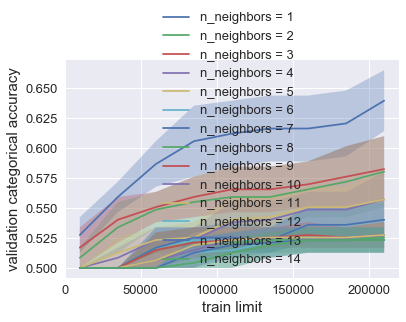

In [5]:
cd = consolidate_dict_data(dd, consolidate_argx=ddi['train_limit'], argx_name='train_limit',
                           consolidate_argy=ddi['score_type'], argy_name='score',
                           consolidate_argz=ddi['n_neighbors'],
                           filters=[(ddi['p'], [1,2])])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('train_limit'),d.get('median'), label='n_neighbors = '+str(a))
    plt.fill_between(d.get('train_limit'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('train limit')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
#plt.savefig("graphs/knn_creditcard_train_limit.png")
plt.show()

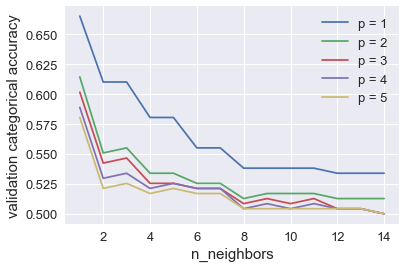

In [6]:
cd = consolidate_dict_data(dd, consolidate_argx=ddi['n_neighbors'], argx_name='n_neighbors',
                           consolidate_argy=ddi['score_type'], argy_name='score',
                           consolidate_argz=ddi['p'],
                           filters=[(ddi['train_limit'], 210000)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('n_neighbors'),d.get('median'), label='p = ' + str(a))
    plt.fill_between(d.get('n_neighbors'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('n_neighbors')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of neighbors\nused for the classification")
plt.savefig("graphs/knn_creditcard_neighbors.png")
plt.show()

# Starcraft dataset

In [7]:
data_set_name = "starcraft"
#dfs, dds, ddis = knn("starcraft",
#                  n_neighbors_values=range(1,15,1),
#                  p_values=range(1,6),
#                  training_sizes=range(500, 2001, 500))
with open("stats/knn_" + data_set_name + "_dict.pikle", 'rb') as handle:
    dds = pickle.load(handle)
with open("stats/knn_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
    ddis = pickle.load(handle)

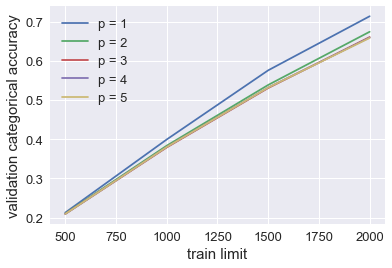

In [9]:
cd = consolidate_dict_data(dds, consolidate_argx=ddis['train_limit'], argx_name='train_limit',
                           consolidate_argy=ddis['score_type'], argy_name='score',
                           consolidate_argz=ddis['p'],
                           filters=[(ddis['n_neighbors'], 1)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('train_limit'),d.get('median'), label='p = ' + str(a))
    plt.fill_between(d.get('train_limit'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('train limit')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/knn_starcraft_train_limit.png")
plt.show()

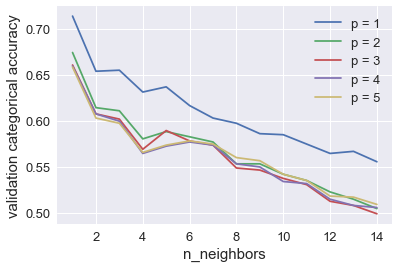

In [10]:
cd = consolidate_dict_data(dds, consolidate_argx=ddis['n_neighbors'], argx_name='n_neighbors',
                           consolidate_argy=ddis['score_type'], argy_name='score',
                           consolidate_argz=ddis['p'],
                           filters=[(ddis['train_limit'], 2000)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('n_neighbors'),d.get('median'), label='p = ' + str(a))
    plt.fill_between(d.get('n_neighbors'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('n_neighbors')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of neighbors\nused for the classification")
plt.savefig("graphs/knn_starcraft_neighbors.png")
plt.show()